In [111]:
#importing the library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
#importing the dataset
dataset=pd.read_csv("Prostate_Cancer.csv")

In [113]:
#viewing the dataset
dataset.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [114]:
dataset["diagnosis_result"].unique()

array(['M', 'B'], dtype=object)

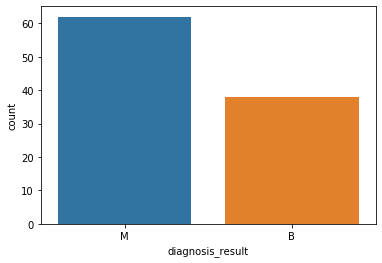

In [115]:
#means diagnosis_result will be your output variable
sns.countplot(dataset["diagnosis_result"])

In [211]:
#dataset X values
#dataset Y values
X=dataset.iloc[:,2:10].values
y=dataset.iloc[:,1].values

In [212]:
#taking care of the missing value
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:,[5,7]])
X[:,[5,7]] = imputer.transform(X[:,[5,7]])

/home/tarun/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [214]:
#splitting the dataset into the training set and into the test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [215]:
# Feature Scaling
#It is necessary here because some variable are high values and some variable are literally having the small values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [216]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/home/tarun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [217]:
y_pred=classifier.predict(X_test)

In [218]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [219]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [220]:
cm

array([[ 3,  0],
       [ 1, 16]])

In [221]:
accuracy(cm)

0.95

In [222]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [223]:
y_pred=classifier.predict(X_test)

In [225]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [226]:
#Confusion Matrix
cm

array([[ 2,  1],
       [ 2, 15]])

In [227]:
accuracy(cm)

0.85

In [228]:
#Support Vector Machines
from sklearn.svm import SVC
classifier=SVC(kernel='linear' , random_state = 0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [229]:
#Predicting the values
y_pred=classifier.predict(X_test)

In [230]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [231]:
cm

array([[ 3,  0],
       [ 1, 16]])

In [232]:
accuracy(cm)

0.95

In [233]:
#We can just do a Kernel trick may be it is better
#Kernel Svm
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [234]:
y_pred=classifier.predict(X_test)

In [235]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)

In [236]:
cm

array([[ 2,  1],
       [ 1, 16]])

In [237]:
accuracy(cm)

0.9

In [238]:
#Naive_Bayes
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [239]:
y_pred=classifier.predict(X_test)

In [240]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [241]:
cm

array([[ 3,  0],
       [ 4, 13]])

In [242]:
accuracy(cm)

0.8

In [243]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [244]:
y_pred=classifier.predict(X_test)

In [245]:
cm=confusion_matrix(y_test,y_pred)

In [246]:
cm

array([[ 3,  0],
       [ 3, 14]])

In [247]:
accuracy(cm)

0.85

In [248]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [249]:
y_pred=classifier.predict(X_test)

In [250]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [251]:
cm

array([[ 2,  1],
       [ 0, 17]])

In [252]:
accuracy(cm)

0.95